## 20201103 import ant

## EDA - plotly & dash - KAGGLE Pokemon All Status Data

### Q2.
포켓몬 리그에서 (legendary)전설의 포켓몬을 사용하지 못하는 이유를 납득시켜주세요.
쓸 수 있을 때와 쓸 수 없을 때 가장 좋은 성능의 포켓몬 타입은?

In [1]:
# import packages
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, ALL, State, MATCH, ALLSMALLER
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read data
df = pd.read_csv('./data/KAGGLE Pokemon All Status Data/pokemon.csv')
# binary data
df.is_legendary = df.is_legendary.astype('str')
df.generation = df.generation.astype('str')

In [3]:
# data info. shape
df.shape

(801, 41)

In [4]:
# data info. head
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
# data info. description (simple statistics)
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000


In [6]:
# data preparation : scaling score columns
scaler = MinMaxScaler()
scaler.fit(df.loc[:,['base_total','attack','sp_attack','defense','sp_defense','speed','hp']])
df.loc[:,['base_total','attack','sp_attack','defense','sp_defense','speed','hp']] = scaler.transform(df.loc[:,['base_total','attack','sp_attack','defense','sp_defense','speed','hp']])*100

In [7]:
# data preparation : poke type master
df['type_cnt'] = 2
df.loc[df.type2==np.nan,'type_cnt'] = 1
df_info = df.loc[:,['pokedex_number', 'name', 'is_legendary', 'generation', 'capture_rate', 'experience_growth','type_cnt']]
df_abil = df.loc[:,['pokedex_number', 'base_total','attack','sp_attack','defense','sp_defense','speed','hp', 'height_m', 'weight_kg']]
df_type1 = df.loc[:,['pokedex_number', 'type1']]
df_type1.columns = ['pokedex_number', 'type']
df_type2 = df.loc[df.type2.isnull()==False,['pokedex_number', 'type2']]
df_type2.columns = ['pokedex_number', 'type']
df_type = pd.concat([df_type1, df_type2],axis=0)
del df_type1, df_type2

In [8]:
# data preparation : dropdown lists
ability_list = ['base_total','attack','sp_attack','defense','sp_defense','speed','hp']
legendary_list = list(df_info.is_legendary.unique())
type_list = list(df_type.type.unique())
genreation_list = list(df_info.generation.astype('str').unique())
# against_list = list(df.columns[1:19])

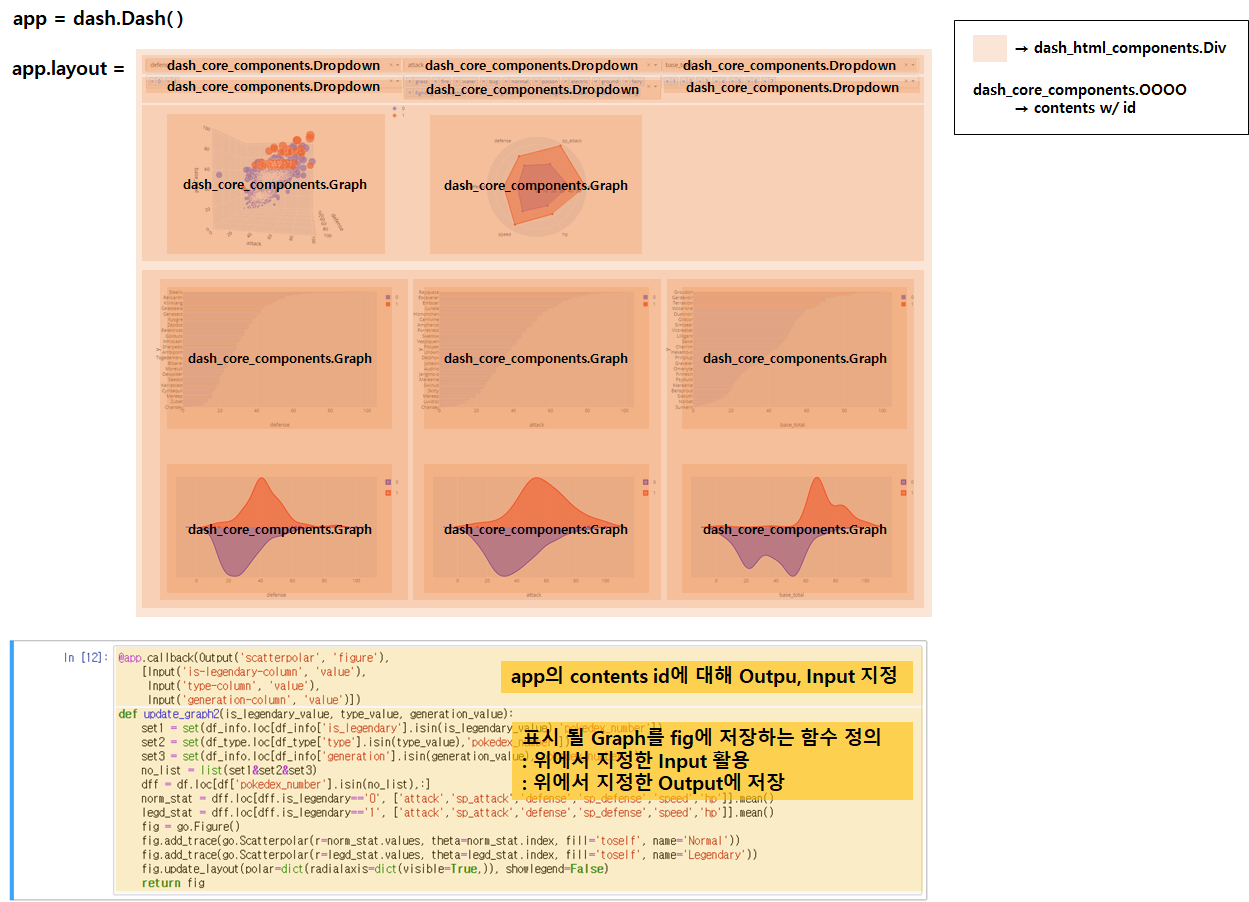

In [9]:
# dash : process explanation
Image('./image/Dash_Explain.png')

In [10]:
# set app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [11]:
# set layout
app.layout = html.Div([html.Div([html.Div([dcc.Dropdown(id='crossfilter-xaxis-column',
                                                        options=[{'label': i, 'value': i} for i in ability_list],
                                                        value='defense')],
                                          style={'width': '33%', 'float': 'left', 'display': 'inline-block'}),
                                 html.Div([dcc.Dropdown(id='crossfilter-yaxis-column',
                                                        options=[{'label': i, 'value': i} for i in ability_list],
                                                        value='attack')],
                                          style={'width': '33%', 'float': 'left', 'display': 'inline-block'}),
                                 html.Div([dcc.Dropdown(id='crossfilter-zaxis-column',
                                                        options=[{'label': i, 'value': i} for i in ability_list],
                                                        value='base_total')],
                                          style={'width': '33%', 'display': 'inline-block'})]),
                       html.Div([html.Div([dcc.Dropdown(id='is-legendary-column',
                                                        options=[{'label': i, 'value': i} for i in legendary_list],
                                                        value=legendary_list, multi=True)],
                                          style={'width': '33%', 'float': 'left', 'display': 'inline-block'}),
                                 html.Div([dcc.Dropdown(id='type-column',
                                                        options=[{'label': i, 'value': i} for i in type_list],
                                                        value=type_list, multi=True)],
                                          style={'width': '33%', 'float': 'left', 'display': 'inline-block'}),
                                 html.Div([dcc.Dropdown(id='generation-column',
                                                        options=[{'label': i, 'value': i} for i in genreation_list],
                                                        value=genreation_list, multi=True)],
                                          style={'width': '33%', 'display': 'inline-block'})]),
                       html.Div([html.Div([dcc.Graph(id='crossfilter-indicator-scatter')],
                                          style={'width': '50%', 'float': 'left', 'display': 'inline-block'}),
                                 html.Div([dcc.Graph(id='scatterpolar')],
                                          style={'width': '50%', 'float': 'left', 'display': 'inline-block'})],
                                style={'display': 'inline-block'}),
                       html.Div([html.Div([html.Div([dcc.Graph(id='x-legendary')], style={'display': 'inline-block', 'height': '80%'}),
                                           html.Div([dcc.Graph(id='x-violin')], style={'display': 'inline-block', 'height': '20%'})],
                                          style={'display': 'inline-block', 'width': '33%'}),
                                 html.Div([html.Div([dcc.Graph(id='y-legendary')], style={'display': 'inline-block', 'height': '80%'}),
                                           html.Div([dcc.Graph(id='y-violin')], style={'display': 'inline-block', 'height': '20%'})],
                                          style={'display': 'inline-block', 'width': '33%'}),
                                 html.Div([html.Div([dcc.Graph(id='z-legendary')], style={'display': 'inline-block', 'height': '80%'}),
                                           html.Div([dcc.Graph(id='z-violin')], style={'display': 'inline-block', 'height': '20%'})],
                                          style={'display': 'inline-block', 'width': '33%'})
                                ])
                      ])

In [12]:
# scatter_3d
@app.callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    [Input('crossfilter-xaxis-column', 'value'),
     Input('crossfilter-yaxis-column', 'value'),
     Input('crossfilter-zaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name, zaxis_column_name, is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = px.scatter_3d(x=dff.loc[:,xaxis_column_name],
                        y=dff.loc[:,yaxis_column_name],
                        z=dff.loc[:,zaxis_column_name],
                        hover_name=dff.name, color=dff.is_legendary, size=dff.base_total,
                       labels = {'x':xaxis_column_name, 'y':yaxis_column_name, 'z':zaxis_column_name})
    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')
    return fig

In [13]:
#  Scatterpolar
@app.callback(Output('scatterpolar', 'figure'),
    [Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_graph2(is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    norm_stat = dff.loc[dff.is_legendary=='0', ['attack','sp_attack','defense','sp_defense','speed','hp']].mean()
    legd_stat = dff.loc[dff.is_legendary=='1', ['attack','sp_attack','defense','sp_defense','speed','hp']].mean()
    # save the chart on fig
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(r=norm_stat.values, theta=norm_stat.index, fill='toself', name='Normal'))
    fig.add_trace(go.Scatterpolar(r=legd_stat.values, theta=legd_stat.index, fill='toself', name='Legendary'))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,)), showlegend=False)
    return fig

In [14]:
# bar & violin by axes
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
@app.callback(
    Output('x-legendary', 'figure'),
    [Input('crossfilter-xaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_x_bar(xaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = px.bar(y=dff.name, x=dff.loc[:,xaxis_column_name],
            hover_name=dff.name, color=dff.is_legendary)
    fig.update_xaxes(title=xaxis_column_name)
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    return fig
@app.callback(
    Output('x-violin', 'figure'),
    [Input('crossfilter-xaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_x_violin(xaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = go.Figure()
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='0',xaxis_column_name], y = ['']*np.sum(dff.is_legendary=='0'),
                        legendgroup='0', scalegroup='0', name='0',
                        side='negative', line_color="blue"))
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='1',xaxis_column_name], y = ['']*np.sum(dff.is_legendary=='1'),
                        legendgroup='1', scalegroup='1', name='1',
                        side='positive', line_color="red"))
    fig.update_traces(orientation='h')
    fig.update_xaxes(title=xaxis_column_name)
    return fig
# yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
@app.callback(
    Output('y-legendary', 'figure'),
    [Input('crossfilter-yaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_y_bar(yaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = px.bar(y=dff.name, x=dff.loc[:,yaxis_column_name],
            hover_name=dff.name, color=dff.is_legendary)
    fig.update_xaxes(title=yaxis_column_name)
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    return fig
@app.callback(
    Output('y-violin', 'figure'),
    [Input('crossfilter-yaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_y_violin(yaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = go.Figure()
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='0',yaxis_column_name], y = ['']*np.sum(dff.is_legendary=='0'),
                        legendgroup='0', scalegroup='0', name='0',
                        side='negative', line_color="blue"))
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='1',yaxis_column_name], y = ['']*np.sum(dff.is_legendary=='1'),
                        legendgroup='1', scalegroup='1', name='1',
                        side='positive', line_color="red"))
    fig.update_traces(orientation='h')
    fig.update_xaxes(title=yaxis_column_name)
    return fig
# zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
@app.callback(
    Output('z-legendary', 'figure'),
    [Input('crossfilter-zaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_z_bar(zaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = px.bar(y=dff.name, x=dff.loc[:,zaxis_column_name],
            hover_name=dff.name, color=dff.is_legendary)
    fig.update_xaxes(title=zaxis_column_name)
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    return fig
@app.callback(
    Output('z-violin', 'figure'),
    [Input('crossfilter-zaxis-column', 'value'),
     Input('is-legendary-column', 'value'),
     Input('type-column', 'value'),
     Input('generation-column', 'value')])
def update_z_violin(zaxis_column_name,is_legendary_value, type_value, generation_value):
    # selected pokedex_numbers by dropdown
    set1 = set(df_info.loc[df_info['is_legendary'].isin(is_legendary_value),'pokedex_number'])
    set2 = set(df_type.loc[df_type['type'].isin(type_value),'pokedex_number'])
    set3 = set(df_info.loc[df_info['generation'].isin(generation_value),'pokedex_number'])
    no_list = list(set1&set2&set3)
    # dataframe with selected pokedex_numbers
    dff = df.loc[df['pokedex_number'].isin(no_list),:]
    # save the chart on fig
    fig = go.Figure()
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='0',zaxis_column_name], y = ['']*np.sum(dff.is_legendary=='0'),
                        legendgroup='0', scalegroup='0', name='0',
                        side='negative', line_color="blue"))
    fig.add_trace(go.Violin(x=dff.loc[dff.is_legendary=='1',zaxis_column_name], y = ['']*np.sum(dff.is_legendary=='1'),
                        legendgroup='1', scalegroup='1', name='1',
                        side='positive', line_color="red"))
    fig.update_traces(orientation='h')
    fig.update_xaxes(title=zaxis_column_name)
    return fig

In [15]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
